In [2]:
import os

In [3]:
os.chdir("C:/Users/pavan/Toxic Tweets Dataset")

In [4]:
import pandas as pd
tweets = pd.read_csv("FinalBalancedDataset.csv")

In [5]:
tweets.drop(columns="Unnamed: 0", axis=1, inplace=True)

In [6]:
tweets.head(10)

Toxicity                                              tweet
0         0   @user when a father is dysfunctional and is s...
1         0  @user @user thanks for #lyft credit i can't us...
2         0                                bihday your majesty
3         0  #model   i love u take with u all the time in ...
4         0             factsguide: society now    #motivation
5         0  [2/2] huge fan fare and big talking before the...
6         0   @user camping tomorrow @user @user @user @use...
7         0  the next school year is the year for exams.ð...
8         0  we won!!! love the land!!! #allin #cavs #champ...
9         0   @user @user welcome here !  i'm   it's so #gr...

In [7]:
# Features that seperates Toxicity
tweets.groupby('Toxicity').describe()

tweet                                                               
          count unique                                                top freq
Toxicity                                                                      
0         32592  30389  #model   i love u take with u all the time in ...  319
1         24153  23924  @user you might be a libtard if... #libtard  #...   40

In [8]:
tweets['length'] = tweets['tweet'].apply(len)

In [9]:
tweets.head()

Toxicity                                              tweet  length
0         0   @user when a father is dysfunctional and is s...     102
1         0  @user @user thanks for #lyft credit i can't us...     122
2         0                                bihday your majesty      21
3         0  #model   i love u take with u all the time in ...      86
4         0             factsguide: society now    #motivation      39

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

In [11]:
%matplotlib inline

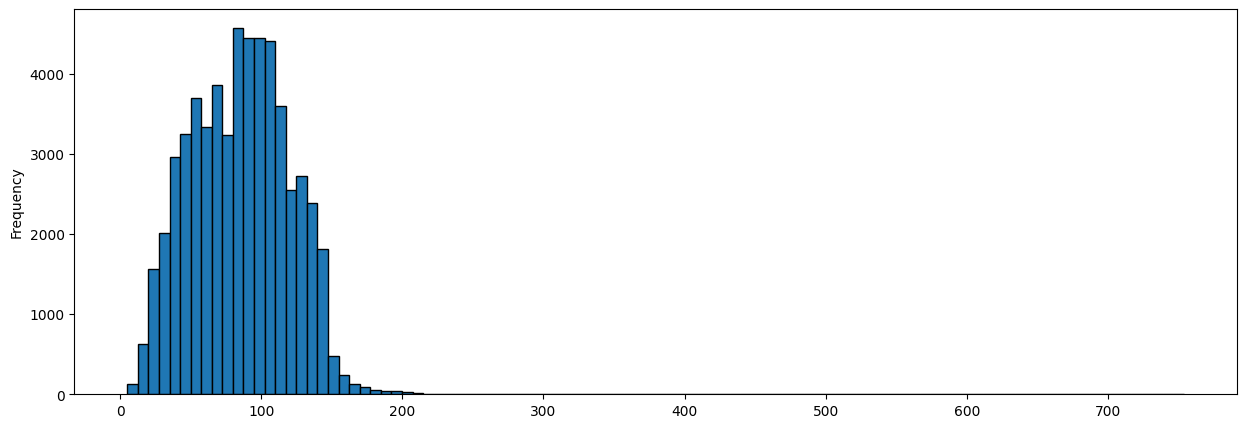

In [12]:
tweets['length'].plot.hist(bins=100, edgecolor='black', figsize=(15,5))
plt.show()

In [13]:
tweets['length'].describe()

count    56745.000000
mean        85.043792
std         35.252390
min          5.000000
25%         57.000000
50%         86.000000
75%        110.000000
max        754.000000
Name: length, dtype: float64

In [14]:
tweets[tweets['length'] == 754]

Toxicity                                              tweet  length
49827         1  RT @TrxllLegend: One good girl is worth a thou...     754

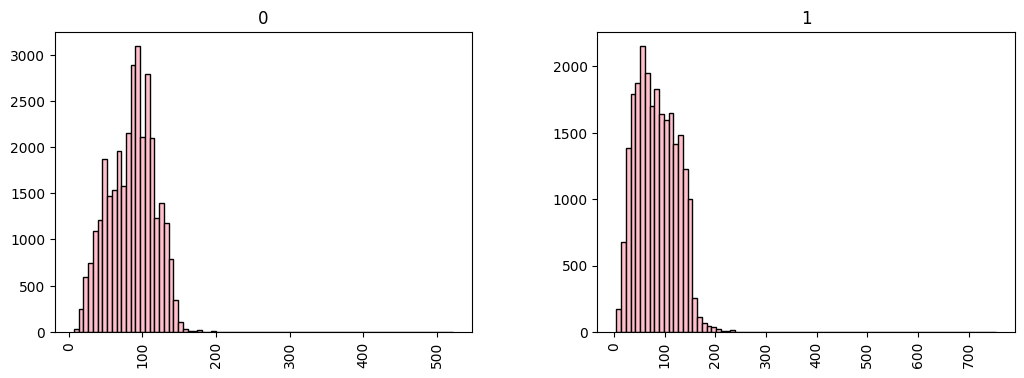

In [15]:
tweets.hist(column='length', by='Toxicity', bins=80, color = 'pink', edgecolor='black', figsize=(12,4))
plt.show()

In [17]:
!pip install nltk


[notice] A new release of pip available: 22.3.1 -> 23.2.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [18]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import re

# Download the "stopwords" resource 
nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\pavan\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\pavan\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [19]:
def text_process(mess):
    """
    1. Remove punctuations
    2. Remove stop words
    3. Return list of clean text words
    4. Return the cleaned text as a string
    """
    # Remove punctuations and non-letter characters using regex
    no_punc = re.sub(r'[^a-zA-Z\s]', '', mess.lower())
    
    # Tokenize the text
    tokens = word_tokenize(no_punc)
    
    # Remove stop words
    tokens = [word for word in tokens if word.lower() not in set(stopwords.words('english'))]
    
    # Join the tokens back into a cleaned text string
    return ' '.join(tokens)

In [20]:
# Perform tokenization and update the column in the tweets df
tweets['tweet'] = tweets['tweet'].apply(text_process)

In [21]:
tweets.head(3)

Toxicity                                              tweet  length
0         0  user father dysfunctional selfish drags kids d...     102
1         0  user user thanks lyft credit cant use cause do...     122
2         0                                     bihday majesty      21

***Applying Bag of Words (bow) model***

In [20]:
from sklearn.feature_extraction.text import CountVectorizer

In [21]:
bow_vector = CountVectorizer()

In [22]:
bow = bow_vector.fit_transform(tweets['tweet'])

***Applying Term freq inverse document frequency (TFIDF) model***

In [22]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer().fit_transform(tweets['tweet'])

## Applying different methods of prediction for the obtained Bag of Words(Bow) model

1. Decision Trees
2. Random Forests
3. Naive Bayes Model
4. K-NN Classifier
5. SVM

### *Decision Trees* 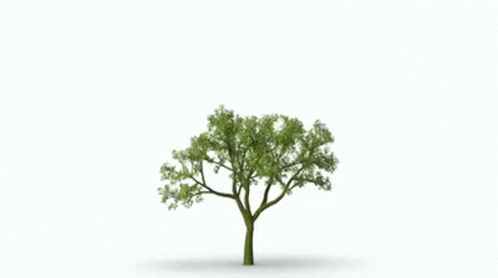

In [24]:
# Defining our target variable
y = tweets['Toxicity']

In [25]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(bow, y, test_size=0.2)

In [26]:
from sklearn.tree import DecisionTreeClassifier

dt_model = DecisionTreeClassifier()

In [27]:
# Let's train our model
dt_model.fit(X_train, y_train)

DecisionTreeClassifier()

In [28]:
# Now let's make predictions on our test data
y_pred = dt_model.predict(X_test)

## Evaluation metrics for our Decision Tree model

1. Classification report
2. Confusion matrix
3. Area Under ROC curve

In [29]:
from sklearn.metrics import classification_report, confusion_matrix, auc, roc_curve

**Classification report**

This will just compare true labels of our data versus the predictions that our model has made 

In [30]:
# Viewing the report in a pandas dataframe for better readabiity

pd.DataFrame(classification_report(y_test, y_pred, output_dict=True)).transpose()

precision    recall  f1-score       support
0              0.937034  0.948430  0.942698   6496.000000
1              0.929828  0.914692  0.922198   4853.000000
accuracy       0.934003  0.934003  0.934003      0.934003
macro avg      0.933431  0.931561  0.932448  11349.000000
weighted avg   0.933953  0.934003  0.933932  11349.000000

**Confusion Matrix**

A confusion matrix is a quick way to compare the labels a model predicts and the actual labels it was supposed to predict

In general, this gives us an idea of where the model is getting confused

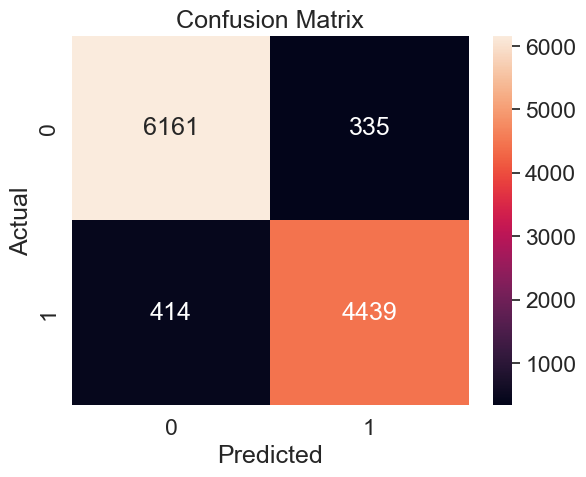

In [31]:
# Making our confusion matrix more visual with Seaborn's heatmap()

import seaborn as sns

sns.set(font_scale=1.5)
# Create a confusion matrix
cm = confusion_matrix(y_test, y_pred)
cmdf = pd.DataFrame(cm)
sns.heatmap(data=cmdf, annot=True, fmt='d', cmap='rocket')

# Customize
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

**Area under the receiver operating characteristic curve (AUC/ROC)**

* Area under curve (AUC)
* ROC curve

ROC curves are a comparison of a model's true positive rate (tpr) versus a model's false positive rate (fpr)

* True positive = model predicts 1 when truth is 1
* False positive = model predicts 1 when truth is 0
* True negative = model predicts 0 when truth is 0
* false negative = model predicts 0 when truth is 1


In [32]:
# Let's make predictions with probabilities

y_probs = dt_model.predict_proba(X_test)

# Probabilities that this is a positive class(1)
y_probs_positive = y_probs[:, 1]

In [33]:
y_probs_positive[:10]

array([0., 1., 0., 0., 1., 0., 0., 0., 1., 0.])

In [34]:
# Calculate fpr, tpr and thresholds

fpr, tpr, thresholds = roc_curve(y_test, y_probs_positive)

In [35]:
def plot_roc_curve(fpr, tpr):
    """
    plots an ROC curve given the fpr
    and tpr of a model
    """
    
    # Plot roc curve
    plt.plot(fpr, tpr, color="orange", label="ROC")
    # Plot line with no predictive power (baseline)
    plt.plot([0, 1], [0, 1], color="darkblue", linestyle="--", label="Guessing")
    
    # Customize the plot
    plt.xlabel("False positive rate (fpr)")
    plt.ylabel("True positive rate (tpr)")
    plt.title("Receiver Operating Characteristic (ROC) curve")
    plt.legend()
    plt.show()
    

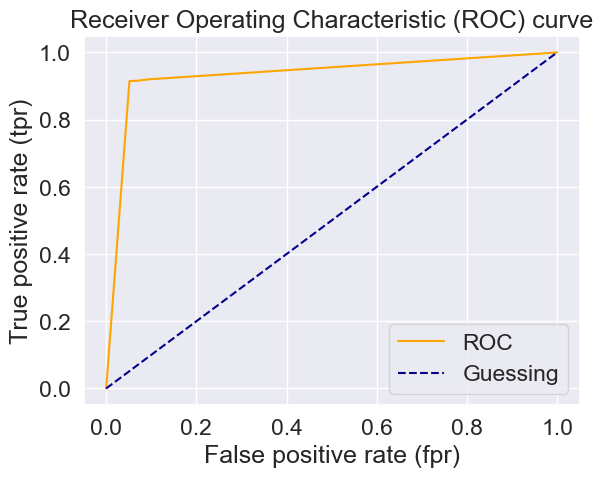

In [36]:
plot_roc_curve(fpr, tpr)

In [41]:
# Let's check roc_auc_score(Score for Area under the curve considering max score to be 1.0)

from sklearn.metrics import roc_auc_score
roc_auc_score(y_test, y_probs_positive)

0.9322584761698366

### *Random Forest*

In [42]:
from sklearn.ensemble import RandomForestClassifier 

In [43]:
X_train, X_test, y_train, y_test = train_test_split(bow, y, test_size=0.2)

In [44]:
rf_model = RandomForestClassifier(n_estimators=100)

In [45]:
rf_model.fit(X_train, y_train)

RandomForestClassifier()

In [46]:
y_pred = rf_model.predict(X_test)

In [47]:
# Evaluation metrics
from sklearn.metrics import accuracy_score

print("Accuracy Score: ", accuracy_score(y_test, y_pred)*100)

Accuracy Score:  93.59414926425235


In [48]:
# Classification report 
pd.DataFrame(classification_report(y_test, y_pred, output_dict=True)).transpose()

precision    recall  f1-score       support
0              0.938233  0.951822  0.944978   6559.000000
1              0.932694  0.914196  0.923353   4790.000000
accuracy       0.935941  0.935941  0.935941      0.935941
macro avg      0.935463  0.933009  0.934166  11349.000000
weighted avg   0.935895  0.935941  0.935851  11349.000000

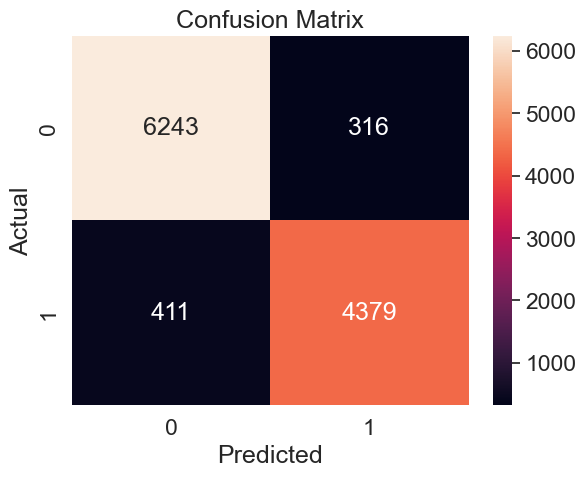

In [49]:
# Confusion matrix

import seaborn as sns

sns.set(font_scale=1.5)
# Create a confusion matrix
cm = confusion_matrix(y_test, y_pred)
cmdf = pd.DataFrame(cm)
sns.heatmap(data=cmdf, annot=True, fmt='d', cmap='rocket')

# Customize
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

In [50]:
# ROC curves
y_probs = rf_model.predict_proba(X_test)

# Probabilities that this is a positive class(1)
y_probs_positive = y_probs[:, 1]

In [51]:
# Calculate fpr, tpr and thresholds

fpr, tpr, thresholds = roc_curve(y_test, y_probs_positive)

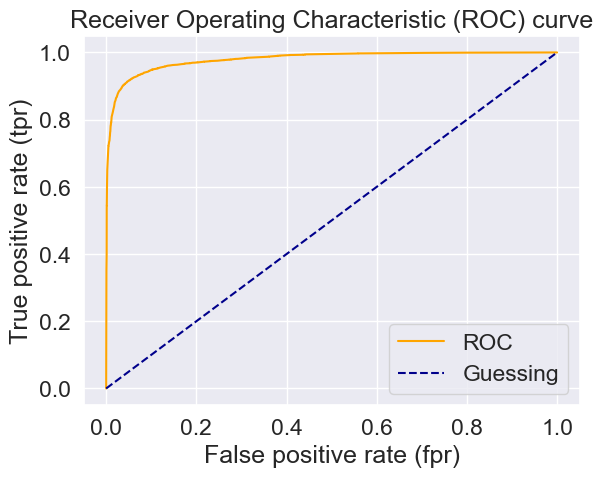

In [52]:
plot_roc_curve(fpr, tpr)

### *Naive Bayes*

In [53]:
from sklearn.naive_bayes import MultinomialNB

In [54]:
nb_model = MultinomialNB()

In [55]:
nb_model.fit(X_train, y_train)

MultinomialNB()

In [56]:
y_pred = nb_model.predict(X_test)

In [57]:
from sklearn.metrics import accuracy_score

print("Accuracy Score: ", accuracy_score(y_test, y_pred)*100)

Accuracy Score:  91.60278438628954


In [58]:
# Classification report 
pd.DataFrame(classification_report(y_test, y_pred, output_dict=True)).transpose()

precision    recall  f1-score       support
0              0.950933  0.901204  0.925401   6559.000000
1              0.873758  0.936326  0.903960   4790.000000
accuracy       0.916028  0.916028  0.916028      0.916028
macro avg      0.912346  0.918765  0.914681  11349.000000
weighted avg   0.918360  0.916028  0.916352  11349.000000

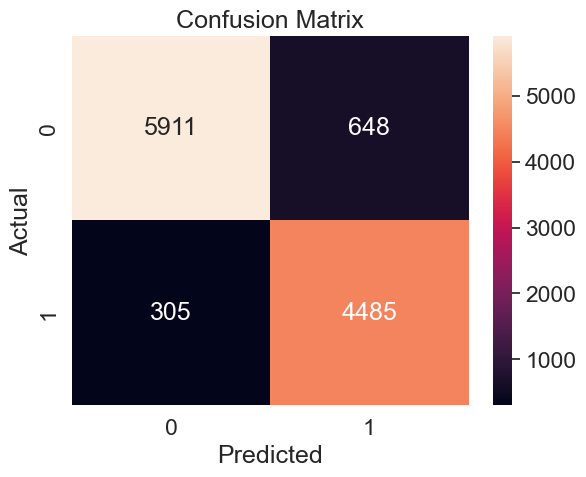

In [59]:
# Confusion matrix

import seaborn as sns

sns.set(font_scale=1.5)
# Create a confusion matrix
cm = confusion_matrix(y_test, y_pred)
cmdf = pd.DataFrame(cm)
sns.heatmap(data=cmdf, annot=True, fmt='d', cmap='rocket')

# Customize
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

In [60]:
# ROC curves
y_probs = nb_model.predict_proba(X_test)

# Probabilities that this is a positive class(1)
y_probs_positive = y_probs[:, 1]

In [61]:
# Calculate fpr, tpr and thresholds

fpr, tpr, thresholds = roc_curve(y_test, y_probs_positive)

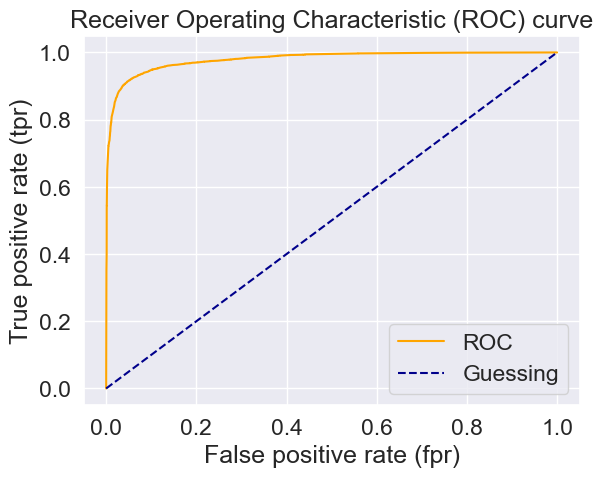

In [62]:
plot_roc_curve(fpr, tpr)

### *K-NN Classifier*

In [39]:
from sklearn.neighbors import KNeighborsClassifier

In [40]:
knn_model = KNeighborsClassifier()

In [75]:
knn_model.fit(X_train, y_train)

KNeighborsClassifier()

In [76]:
y_pred = knn_model.predict(X_test)

In [77]:
from sklearn.metrics import accuracy_score

print("Accuracy Score: ", accuracy_score(y_test, y_pred)*100)

Accuracy Score:  89.16204070843247


In [78]:
# Classification report 
pd.DataFrame(classification_report(y_test, y_pred, output_dict=True)).transpose()

precision    recall  f1-score      support
0              0.859145  0.971794  0.912005   6559.00000
1              0.952926  0.781837  0.858945   4790.00000
accuracy       0.891620  0.891620  0.891620      0.89162
macro avg      0.906036  0.876816  0.885475  11349.00000
weighted avg   0.898727  0.891620  0.889610  11349.00000

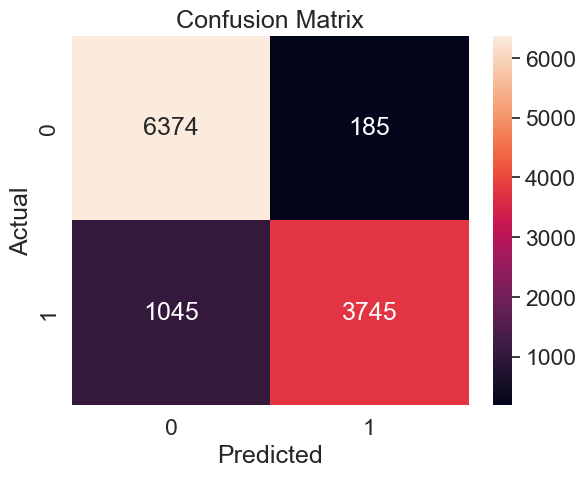

In [79]:
# Confusion matrix

import seaborn as sns

sns.set(font_scale=1.5)
# Create a confusion matrix
cm = confusion_matrix(y_test, y_pred)
cmdf = pd.DataFrame(cm)
sns.heatmap(data=cmdf, annot=True, fmt='d', cmap='rocket')

# Customize
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

In [80]:
# ROC curves
y_probs = knn_model.predict_proba(X_test)

# Probabilities that this is a positive class(1)
y_probs_positive = y_probs[:, 1]

In [81]:
# Calculate fpr, tpr and thresholds

fpr, tpr, thresholds = roc_curve(y_test, y_probs_positive)

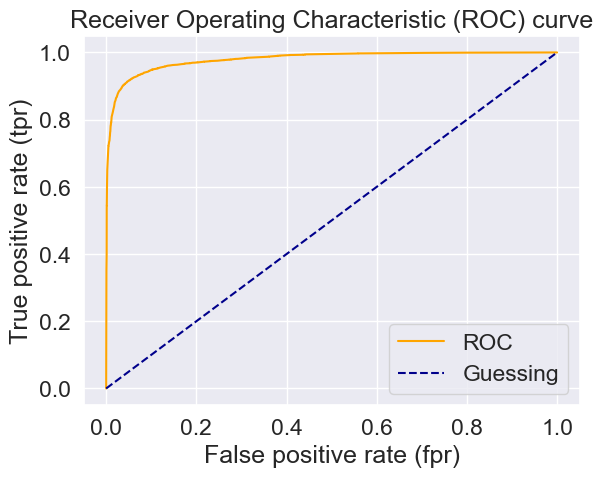

In [82]:
plot_roc_curve(fpr, tpr)

### *Support Vector Matrix (SVM)*

In [54]:
from sklearn.svm import SVC

In [64]:
svc_model = SVC(kernel='rbf', probability=True)

In [65]:
svc_model.fit(X_train, y_train)

SVC(probability=True)

In [66]:
y_pred = svc_model.predict(X_test)

In [67]:
from sklearn.metrics import accuracy_score

print("Accuracy Score: ", accuracy_score(y_test, y_pred)*100)

Accuracy Score:  94.01709401709401


In [68]:
# Classification report 
pd.DataFrame(classification_report(y_test, y_pred, output_dict=True)).transpose()

precision    recall  f1-score       support
0              0.927574  0.972404  0.949460   6559.000000
1              0.959535  0.896033  0.926698   4790.000000
accuracy       0.940171  0.940171  0.940171      0.940171
macro avg      0.943555  0.934219  0.938079  11349.000000
weighted avg   0.941064  0.940171  0.939853  11349.000000

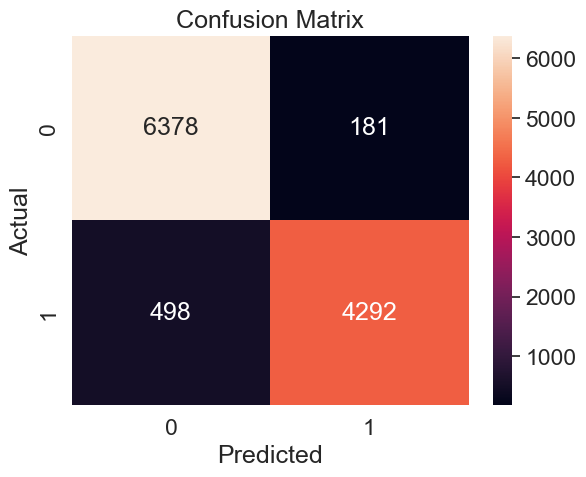

In [69]:
# Confusion matrix

import seaborn as sns

sns.set(font_scale=1.5)
# Create a confusion matrix
cm = confusion_matrix(y_test, y_pred)
cmdf = pd.DataFrame(cm)
sns.heatmap(data=cmdf, annot=True, fmt='d', cmap='rocket')

# Customize
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

In [70]:
# ROC curves
y_probs = svc_model.predict_proba(X_test)

# Probabilities that this is a positive class(1)
y_probs_positive = y_probs[:, 1]

In [71]:
# Calculate fpr, tpr and thresholds

fpr, tpr, thresholds = roc_curve(y_test, y_probs_positive)

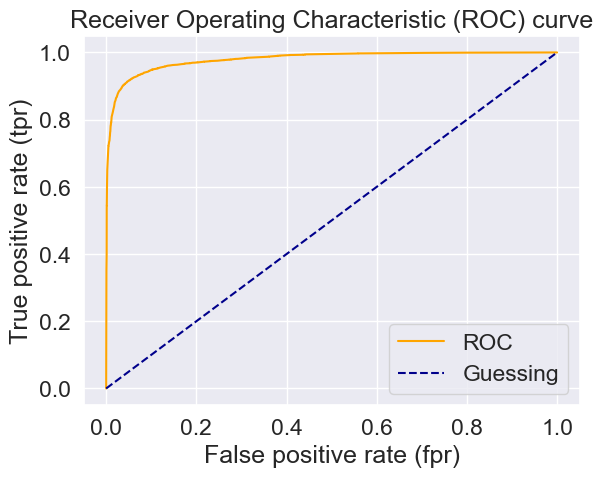

In [72]:
plot_roc_curve(fpr, tpr)

## Applying different methods of prediction for the obtained TFIDF model

1. Decision Trees
2. Random Forests
3. Naive Bayes Model
4. K-NN Classifier
5. SVM

### *Decision Tree*


In [51]:
# Defining our target variable
y = tweets['Toxicity']

In [52]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(tfidf, y, test_size=0.2)

In [25]:
from sklearn.tree import DecisionTreeClassifier

dt_model = DecisionTreeClassifier()

In [26]:
# Let's train our model
dt_model.fit(X_train, y_train)

# Now let's make predictions on our test data
y_pred = dt_model.predict(X_test)

## Evaluation metrics for our model

1. Classification report
2. Confusion matrix
3. Area Under ROC curve

In [30]:
# Viewing the classification report in a pandas dataframe for better readabiity

pd.DataFrame(classification_report(y_test, y_pred, output_dict=True)).transpose()

precision    recall  f1-score       support
0              0.939385  0.947918  0.943632   6605.000000
1              0.926558  0.914840  0.920662   4744.000000
accuracy       0.934091  0.934091  0.934091      0.934091
macro avg      0.932972  0.931379  0.932147  11349.000000
weighted avg   0.934023  0.934091  0.934030  11349.000000

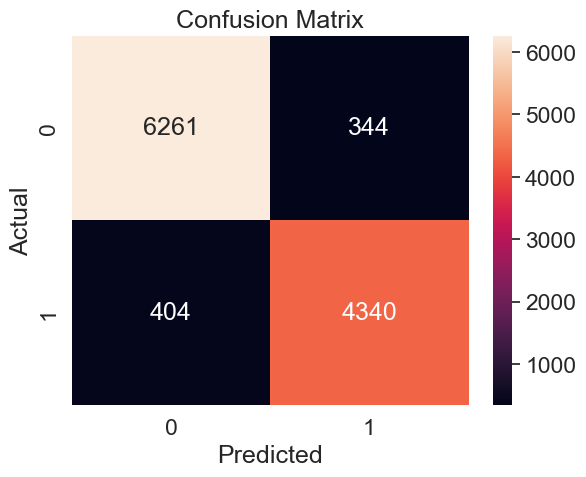

In [31]:
# Confusion matrix

import seaborn as sns

sns.set(font_scale=1.5)
# Create a confusion matrix
cm = confusion_matrix(y_test, y_pred)
cmdf = pd.DataFrame(cm)
sns.heatmap(data=cmdf, annot=True, fmt='d', cmap='rocket')

# Customize
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

In [32]:
# ROC curves
y_probs = dt_model.predict_proba(X_test)

# Probabilities that this is a positive class(1)
y_probs_positive = y_probs[:, 1]

In [33]:
# Calculate fpr, tpr and thresholds

fpr, tpr, thresholds = roc_curve(y_test, y_probs_positive)

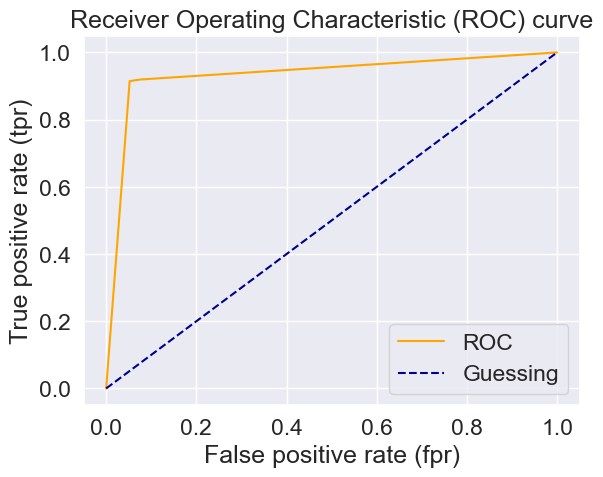

In [36]:
plot_roc_curve(fpr, tpr)

In [37]:
# Let's check roc_auc_score(Score for Area under the curve considering max score to be 1.0)

from sklearn.metrics import roc_auc_score
roc_auc_score(y_test, y_probs_positive)

0.9325562996503493

### *Random Forest*


In [96]:
rf_model = RandomForestClassifier(n_estimators=100)

In [97]:
rf_model.fit(X_train, y_train)

RandomForestClassifier()

In [98]:
y_pred = rf_model.predict(X_test)

In [99]:
# Evaluation metrics
from sklearn.metrics import accuracy_score

print("Accuracy Score: ", accuracy_score(y_test, y_pred)*100)

Accuracy Score:  93.62058331130496


In [100]:
# Classification report

pd.DataFrame(classification_report(y_test, y_pred, output_dict=True)).transpose()

precision    recall  f1-score       support
0              0.928899  0.962548  0.945424   6515.000000
1              0.946933  0.900703  0.923240   4834.000000
accuracy       0.936206  0.936206  0.936206      0.936206
macro avg      0.937916  0.931626  0.934332  11349.000000
weighted avg   0.936581  0.936206  0.935975  11349.000000

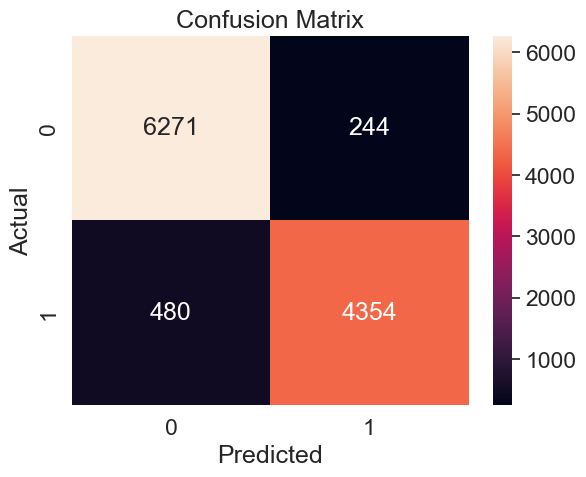

In [101]:
# Confusion matrix

import seaborn as sns

sns.set(font_scale=1.5)
# Create a confusion matrix
cm = confusion_matrix(y_test, y_pred)
cmdf = pd.DataFrame(cm)
sns.heatmap(data=cmdf, annot=True, fmt='d', cmap='rocket')

# Customize
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

In [102]:
# ROC curves
y_probs = rf_model.predict_proba(X_test)

# Probabilities that this is a positive class(1)
y_probs_positive = y_probs[:, 1]

In [103]:
# Calculate fpr, tpr and thresholds

fpr, tpr, thresholds = roc_curve(y_test, y_probs_positive)

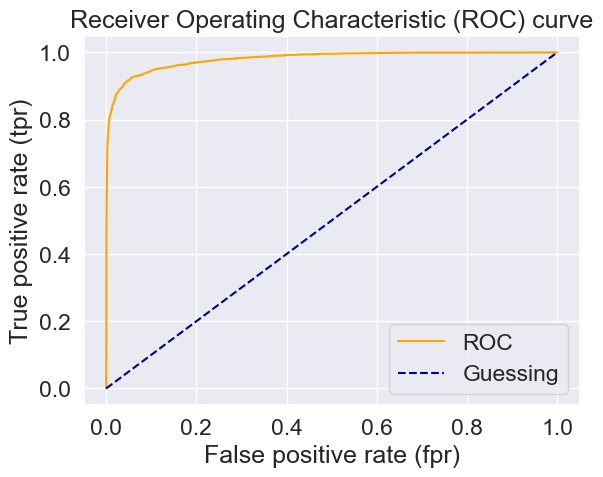

In [104]:
plot_roc_curve(fpr, tpr)

### *Naive Bayes Model*

In [105]:
nb_model = MultinomialNB()

In [106]:
nb_model.fit(X_train, y_train)

MultinomialNB()

In [107]:
y_pred = nb_model.predict(X_test)

In [108]:
from sklearn.metrics import accuracy_score

print("Accuracy Score: ", accuracy_score(y_test, y_pred)*100)

Accuracy Score:  92.15789937439422


In [109]:
# Classification report

pd.DataFrame(classification_report(y_test, y_pred, output_dict=True)).transpose()

precision    recall  f1-score       support
0              0.924144  0.940599  0.932299   6515.000000
1              0.917974  0.895945  0.906826   4834.000000
accuracy       0.921579  0.921579  0.921579      0.921579
macro avg      0.921059  0.918272  0.919562  11349.000000
weighted avg   0.921516  0.921579  0.921449  11349.000000

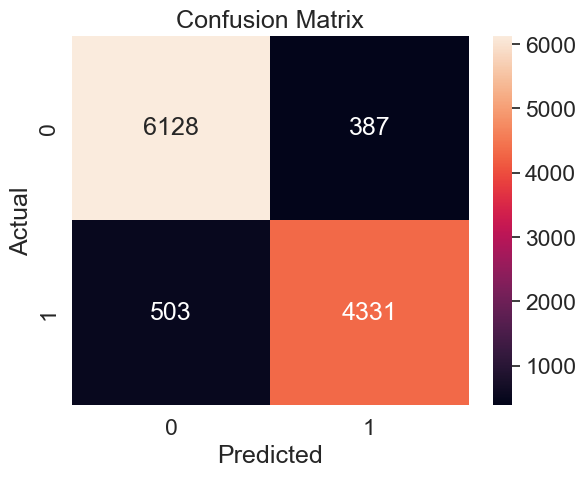

In [110]:
# Confusion matrix

import seaborn as sns

sns.set(font_scale=1.5)
# Create a confusion matrix
cm = confusion_matrix(y_test, y_pred)
cmdf = pd.DataFrame(cm)
sns.heatmap(data=cmdf, annot=True, fmt='d', cmap='rocket')

# Customize
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

In [111]:
# ROC curves
y_probs = nb_model.predict_proba(X_test)

# Probabilities that this is a positive class(1)
y_probs_positive = y_probs[:, 1]

In [112]:
# Calculate fpr, tpr and thresholds

fpr, tpr, thresholds = roc_curve(y_test, y_probs_positive)

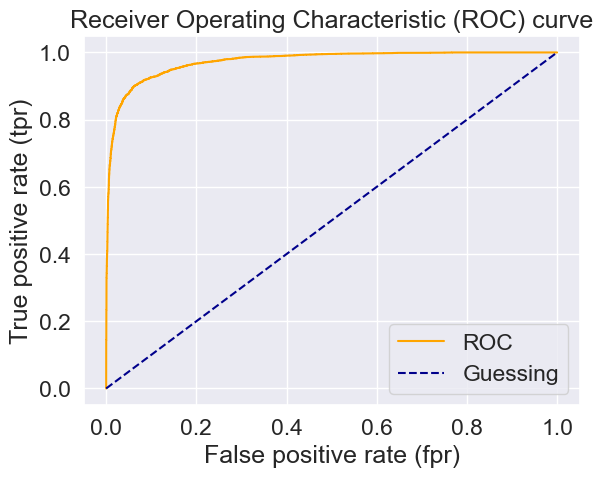

In [113]:
plot_roc_curve(fpr, tpr)

### *K-NN Classifier*

In [41]:
knn_model = KNeighborsClassifier()

In [42]:
knn_model.fit(X_train, y_train)

KNeighborsClassifier()

In [43]:
y_pred = knn_model.predict(X_test)

In [45]:
# Accuracy score
from sklearn.metrics import accuracy_score

print("Accuracy Score: ", accuracy_score(y_test, y_pred)*100)

Accuracy Score:  62.23455811084677


In [46]:
# Classification report 
pd.DataFrame(classification_report(y_test, y_pred, output_dict=True)).transpose()

precision    recall  f1-score       support
0              0.606935  0.996366  0.754356   6605.000000
1              0.952569  0.101602  0.183619   4744.000000
accuracy       0.622346  0.622346  0.622346      0.622346
macro avg      0.779752  0.548984  0.468987  11349.000000
weighted avg   0.751414  0.622346  0.515782  11349.000000

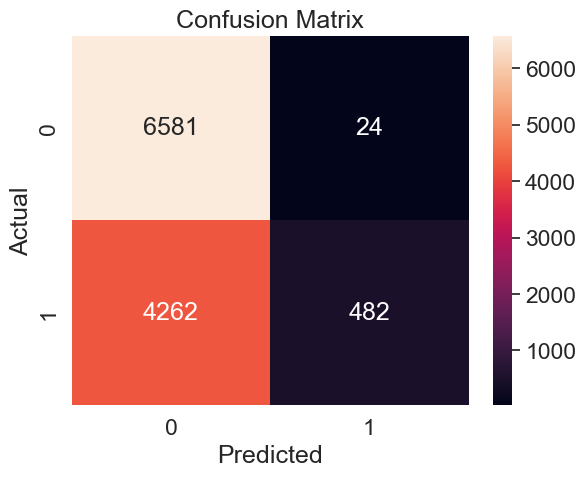

In [47]:
# Confusion matrix

import seaborn as sns

sns.set(font_scale=1.5)
# Create a confusion matrix
cm = confusion_matrix(y_test, y_pred)
cmdf = pd.DataFrame(cm)
sns.heatmap(data=cmdf, annot=True, fmt='d', cmap='rocket')

# Customize
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

In [48]:
# ROC curves
y_probs = knn_model.predict_proba(X_test)

# Probabilities that this is a positive class(1)
y_probs_positive = y_probs[:, 1]

In [49]:
# Calculate fpr, tpr and thresholds

fpr, tpr, thresholds = roc_curve(y_test, y_probs_positive)

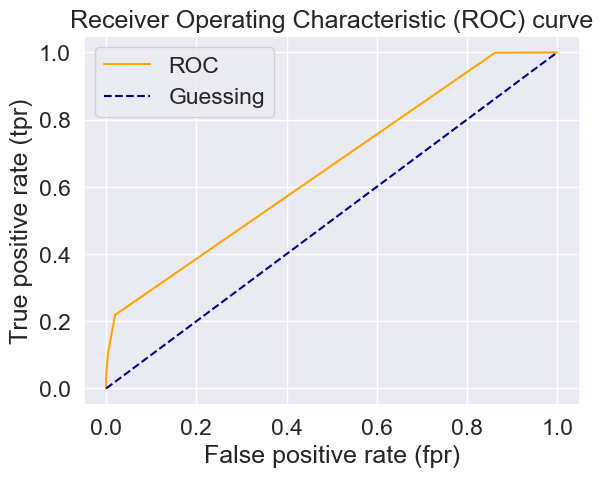

In [50]:
plot_roc_curve(fpr, tpr)

### *Support Vector Matrix (SVM)*

In [55]:
svc_model = SVC(kernel='rbf', probability=True)

In [56]:
svc_model.fit(X_train, y_train)

SVC(probability=True)

In [57]:
y_pred = svc_model.predict(X_test)

In [58]:
#Accuracy score

print("Accuracy Score: ", accuracy_score(y_test, y_pred)*100)

Accuracy Score:  94.43122742091813


In [59]:
# Classification report 
pd.DataFrame(classification_report(y_test, y_pred, output_dict=True)).transpose()

precision    recall  f1-score       support
0              0.927809  0.978727  0.952588   6487.000000
1              0.969374  0.898396  0.932536   4862.000000
accuracy       0.944312  0.944312  0.944312      0.944312
macro avg      0.948592  0.938561  0.942562  11349.000000
weighted avg   0.945616  0.944312  0.943998  11349.000000

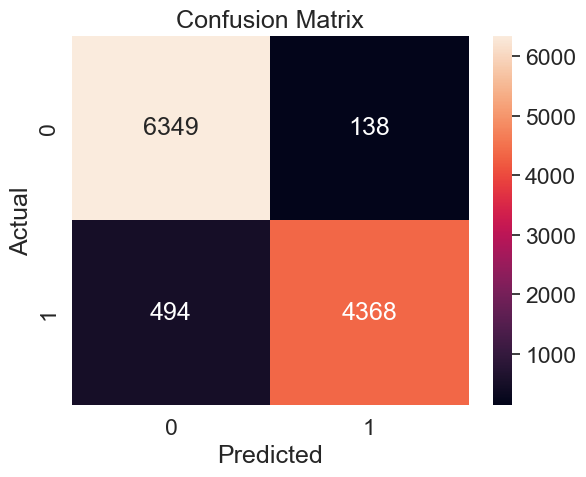

In [60]:
# Confusion matrix

import seaborn as sns

sns.set(font_scale=1.5)
# Create a confusion matrix
cm = confusion_matrix(y_test, y_pred)
cmdf = pd.DataFrame(cm)
sns.heatmap(data=cmdf, annot=True, fmt='d', cmap='rocket')

# Customize
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

In [61]:
# ROC curves
y_probs = svc_model.predict_proba(X_test)

# Probabilities that this is a positive class(1)
y_probs_positive = y_probs[:, 1]

In [62]:
# Calculate fpr, tpr and thresholds

fpr, tpr, thresholds = roc_curve(y_test, y_probs_positive)

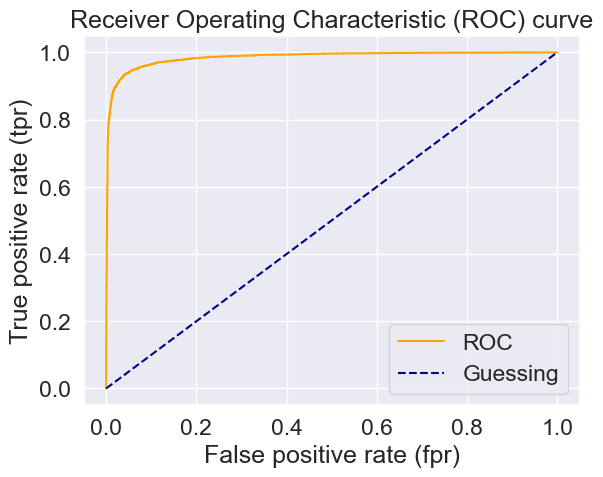

In [63]:
plot_roc_curve(fpr, tpr)